In [1]:
import copy

import numpy as np
from scipy import signal
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
t = np.linspace(0, 200, 201)
f_x = np.sin(np.pi * t / 10) + 2 * np.sin(np.pi * t / 20) + np.cos(np.pi * t / 40)

In [3]:
# pdf = PdfPages('original_signal.pdf')
# fig = plt.figure(figsize=(16, 9))

# plt.rcParams['font.family'] = 'Times new Roman'
# plt.rcParams['font.size'] = 30

# plt.xlabel('times [s]')
# plt.plot(f_x)
# pdf.savefig(fig)
# pdf.close()

In [3]:
max_id = signal.argrelmax(f_x, order=1)
min_id = signal.argrelmin(f_x, order=1)
#max_idのfxを求める
#cubicspline(max_id, fx(max_id))

# max_idのコピーをとり，先頭に0，末尾に200を追加
max_id_copy = copy.copy(max_id[0])
max_id_copy = np.insert(max_id_copy, 0, 0)
max_id_copy = np.insert(max_id_copy, len(max_id_copy), 200)

# min_id max_id同様
min_id_copy = copy.copy(min_id[0])
min_id_copy = np.insert(min_id_copy, 0, 0)
min_id_copy = np.insert(min_id_copy, len(min_id_copy), 200)

# cs = CubicSpline(max_id[0], f_x[max_id])
max_cs = CubicSpline(max_id_copy, f_x[max_id_copy])
min_cs = CubicSpline(min_id_copy, f_x[min_id_copy])
new_x = np.linspace(0, 200, 201)

# local mean
local_mean = (max_cs(new_x) + min_cs(new_x)) / 2

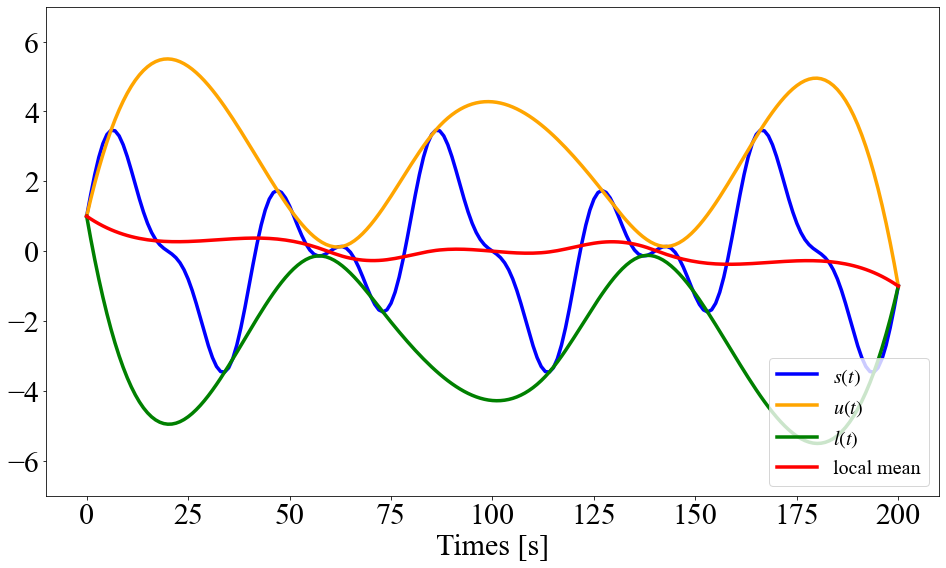

In [14]:
fig = plt.figure(figsize=(16, 9))
pdf = PdfPages('CubicSpline.pdf')

plt.rcParams['font.family'] = 'Times new Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.size'] = 30

ax = plt.axes()
ax.set_facecolor('white')

plt.plot(t, f_x, label=r'$s(t)$', color='blue', lw=3.5)
plt.plot(new_x, max_cs(new_x), label=r'$ u(t) $', color='orange', lw=3.5)
plt.plot(new_x, min_cs(new_x), label=r'$ l(t) $', color='green', lw=3.5)
plt.plot(new_x, local_mean, label=r'local mean', color='red', lw=3.5)
plt.xlabel('Times [s]')
plt.ylim(-7, 7)
plt.legend(loc='lower right', fontsize='20')

pdf.savefig(fig)
pdf.close()


s(t) memd 

In [4]:
import emd
import matplotlib.pyplot as plt
import ht
from MEMD_all import wafa
imf_opts = {'stop_method': 'rilling'}
imf = emd.sift.sift(f_x, imf_opts=imf_opts)
imf = imf.T
freq, amp = ht.FAhilbert(imf, 1)
# f, hht = emd.spectra.hilberthuang(IF, IA, freq_range, sum_time=False)
# # fig, ax = plt.subplots(1, 1) 
# pdf = PdfPages('hoge.pdf')
# emd.plotting.plot_hilberthuang(hht, t, f, time_lims=(10, 190), freq_lims=(0, 0.1), cmap='jet')
freq = wafa(freq, amp, m=3)

In [ ]:
pdf = PdfPages('imf.pdf')

fig = plt.figure(figsize = (10,6))
plt.subplots_adjust(wspace=0.4, hspace=0.8)

plt.rcParams['font.family'] = 'Times new Roman'
plt.rcParams['font.size'] = 10

#グラフを描画するsubplot領域を作成。
ax1 = fig.add_subplot(4, 1, 1)
ax1.plot(t, imf[0, :])
ax1.set_title('IMF$_{1}$')
ax1.set_ylim(-2, 2)

ax2 = fig.add_subplot(4, 1, 2)
ax2.plot(t, imf[1, :])
ax2.set_title('IMF$_{2}$')
ax2.set_ylim(-2, 2)


ax3 = fig.add_subplot(4, 1, 3)
ax3.plot(t, imf[2, :])
ax3.set_title('IMF$_{3}$')
ax3.set_ylim(-2, 2)

ax4 = fig.add_subplot(4, 1, 4)
ax4.plot(t, imf[3, :])
ax4.set_title('trend')
ax4.set_ylim(-2, 2)

pdf.savefig(fig)
pdf.close()


#各subplot領域にデータを渡す

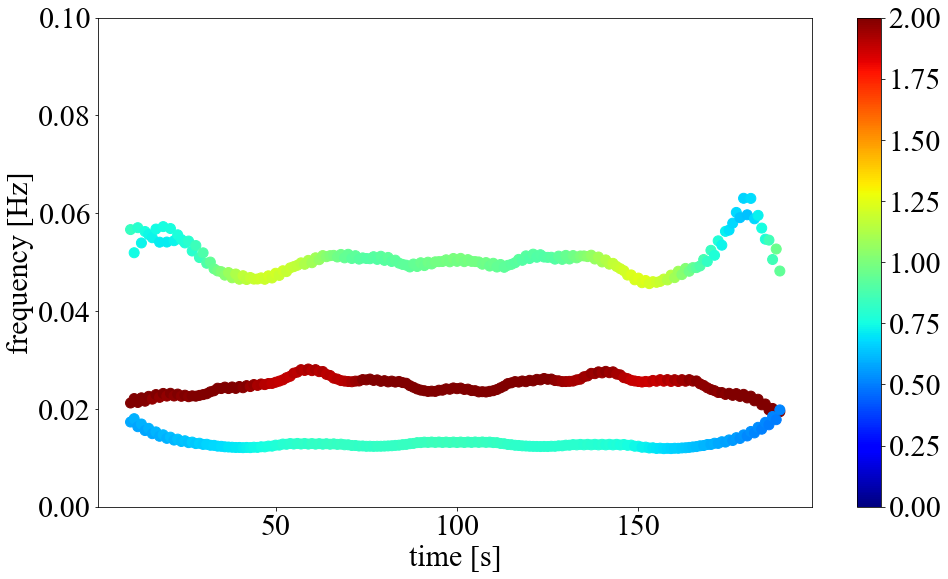

In [20]:
pdf = PdfPages('spectra.pdf')

fig = plt.figure(figsize = (16, 9))

plt.clf()
# plt.figure(dpi=200, figsize=(16, 9))
plt.rcParams['font.family'] = 'Times new Roman'
plt.rcParams['font.size'] = 30
for n in range(3):
    # vflag : clorobarに設定を入れたい時
    plt.scatter(t[10:190], freq[10:190, n], s = 100, c=amp[10:190, n], cmap='jet')
    plt.clim(0, 2)
ax = plt.gca()
ax.set_facecolor('white')
plt.ylim(0, 0.1)
plt.xlabel('time [s]')
plt.ylabel('frequency [Hz]')
# vline
# if vline_flag:
#     plt.vlines(x=top_line, ymin=ymin, ymax=ymax, colors='g', linestyles='solid')
#     plt.vlines(x=impact_line, ymin=ymin, ymax=ymax, colors='r', linestyles='solid')
plt.colorbar()


pdf.savefig(fig)
pdf.close()

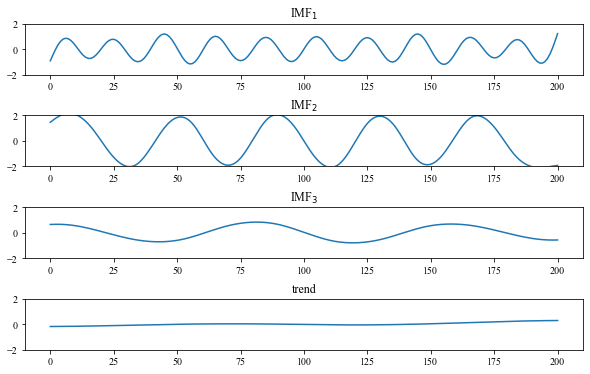

In [11]:
from matplotlib.backends.backend_pdf import PdfPages 
pdf = PdfPages('imf.pdf')

fig = plt.figure(figsize = (10,6))
plt.subplots_adjust(wspace=0.4, hspace=0.8)

plt.rcParams['font.family'] = 'Times new Roman'
plt.rcParams['font.size'] = 10

#グラフを描画するsubplot領域を作成。
ax1 = fig.add_subplot(4, 1, 1)
ax1.plot(t, imf[0, :])
ax1.set_title('IMF$_{1}$')
ax1.set_ylim(-2, 2)

ax2 = fig.add_subplot(4, 1, 2)
ax2.plot(t, imf[1, :])
ax2.set_title('IMF$_{2}$')
ax2.set_ylim(-2, 2)


ax3 = fig.add_subplot(4, 1, 3)
ax3.plot(t, imf[2, :])
ax3.set_title('IMF$_{3}$')
ax3.set_ylim(-2, 2)

ax4 = fig.add_subplot(4, 1, 4)
ax4.plot(t, imf[3, :])
ax4.set_title('trend')
ax4.set_ylim(-2, 2)

pdf.savefig(fig)
pdf.close()


#各subplot領域にデータを渡す